In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

In [54]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, 
                        cv=None,
                        n_jobs=None, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Accuracy")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, scoring='accuracy',
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    '''# Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")'''

    return plt

## Import data (heart failure clinical records)

In [59]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

#
# Need to split data into train/test, and transform (normalize) values to be between [0, 1]
#
X = data.copy()
X.drop(columns='DEATH_EVENT', inplace=True)

y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

print(X_train_minmax.shape)

(224, 12)


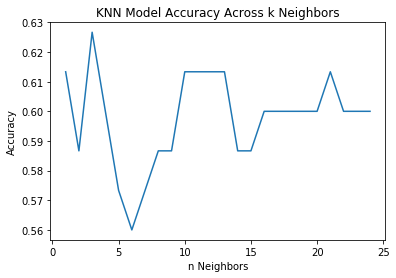

In [56]:
scores = []
x = np.arange(1, 25)
for i in range(1, 25, 1):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_minmax, y_train)
    scores.append(model.score(X_test_minmax, y_test))

plt.plot(x, scores)
plt.xlabel('n Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy Across k Neighbors')
plt.show()

## KNN Classifier

### Let us tune this algorithm with the use of GridSearchCV, so that we may hyperparameter tune efficiently.

That improved performance, but there are a number of hyperparameters that we can still tune.  We can use GridSearchCV to find the optimal hyperparameters with minimal effort.  We may define a function that will perform these computations for any other dataset of our choosing.

In [28]:
def knn_tuning(X_train, y_train, X_test, y_test, title):
    #create new a knn model
    knn2 = KNeighborsClassifier()

    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'n_neighbors': np.arange(1, 25)}  # , 
                  # 'weights': ['uniform', 'distance'],
                  # 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
    knn_gscv = GridSearchCV(knn2, param_grid, cv=5) #fit model to data
    knn_gscv.fit(X_train, y_train)

    #check top performing n_neighbors value
    print(knn_gscv.best_params_)

    #check mean score for the top performing value of n_neighbors
    print(knn_gscv.best_score_)
    
    try:
        plot_roc_curve(knn_gscv, X_test, y_test)  # doctest: +SKIP
        plt.title(title)
        plt.show() 
    except:
        pass
    
    return knn_gscv

{'n_neighbors': 9}
0.7410101010101011


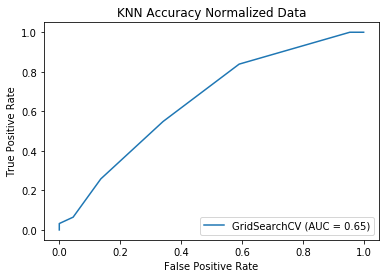

In [57]:
#knn_tuning(X_train, y_train, 'KNN Accuracy Non-normalized Data')
model = knn_tuning(X_train_minmax, y_train, X_test_minmax, 
                   y_test, 'KNN Accuracy Normalized Data')

In [30]:
pred = model.predict(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc(fpr, tpr)

0.5095307917888563

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

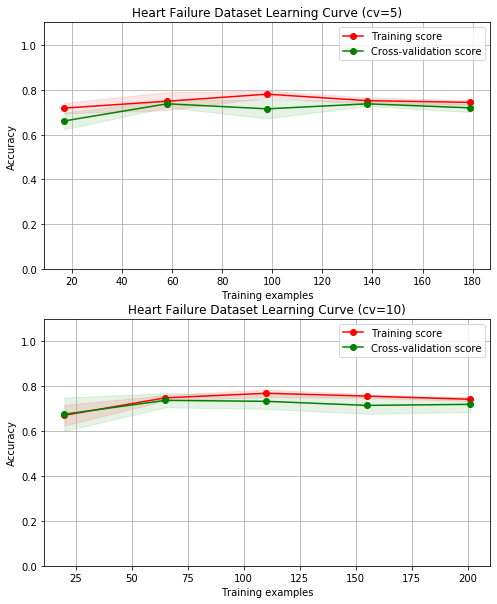

In [32]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
plot_learning_curve(KNeighborsClassifier(n_neighbors=6), 
                    'Heart Failure Dataset Learning Curve (cv=5)', 
                    X_train_minmax, y_train, axes=axes[0], ylim=(0.0, 1.1),
                    cv=5, n_jobs=4)
plot_learning_curve(KNeighborsClassifier(n_neighbors=6), 
                    'Heart Failure Dataset Learning Curve (cv=10)', 
                    X_train_minmax, y_train, axes=axes[1], ylim=(0.0, 1.1),
                    cv=10, n_jobs=4)


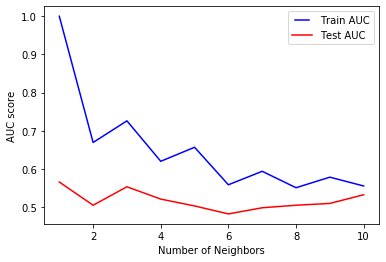

In [34]:
generate_tuning_plot(X_train_minmax, y_train, X_test_minmax, 
                     y_test, KNeighborsClassifier, 'Number of Neighbors')

Based on our training data, with 5 fold cross validation, the optimal number of neighbors that explains our training data is 6.  Changing the number of neighbors increases our accuracy by almost 4% on training with the normalized data. However, our accuracy is still pretty bad on the testing set.  

I wonder if we have too many variables trying to explain our data, and not enough actual data to support the curse of dimensionality we are trying to fit.  There is no easy way to do this with KNN.  However, we could use a regularization algorithm such as LASSO or elastic net which would explain our most valuable features.  Or we could find those most important features from a random forest.  Or we could peform the following:




    Feature importance is not defined for the KNN Classification algorithm. There is no easy way to compute the features responsible for a classification here. What you could do is use a random forest classifier which does have the feature_importances_ attribute. Even in this case though, the feature_importances_ attribute tells you the most important features for the entire model, not specifically the sample you are predicting on.

    If you are set on using KNN though, then the best way to estimate feature importance is by taking the sample to predict on, and computing its distance from each of its nearest neighbors for each feature (call these neighb_dist). Then do the same computations for a few random points (call these rand_dist) instead of the nearest neighbors. Then for each feature, you take the ratio of neighb_dist / rand_dist, and the smaller the ratio, the more important that feature is.


https://stackoverflow.com/questions/55314345/how-to-find-feature-importance-or-variable-importance-graph-for-knnclassifier

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

# Now let's repeat for diabetes

In [62]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
print(data.columns)

# Handle Categorical features
clfs = {c:preprocessing.LabelEncoder() for c in ['Gender', 'family_history_with_overweight',
                                   'FAVC', 'CAEC', 'SMOKE', 
                                   'SCC','CALC', 'MTRANS', 'NObeyesdad']}

for col, clf in clfs.items():
    df[col] = clfs[col].fit_transform(df[col])
    
#
# Need to split data into train/test, and transform (normalize) values to be between [0, 1]
#

X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

print(X_train_minmax.shape)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
(1583, 16)


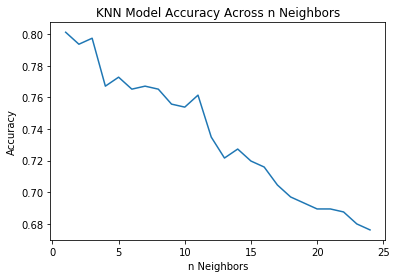

In [50]:
scores = []
x = np.arange(1, 25)
for i in range(1, 25, 1):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_minmax, y_train)
    scores.append(model.score(X_test_minmax, y_test))

plt.plot(x, scores)
plt.xlabel('n Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy Across n Neighbors')
plt.show()

{'n_neighbors': 1}
0.7896517989058818


0.8783945194811231

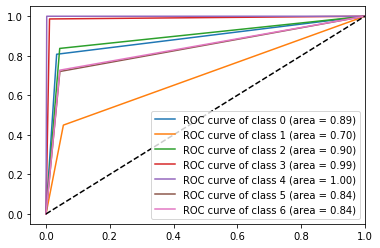

In [48]:
#knn_tuning(X_train, y_train, 'KNN Accuracy Non-normalized Data')
model = knn_tuning(X_train_minmax, y_train, X_test_minmax, 
                   y_test, 'KNN Accuracy Normalized Data')

y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
y_pred = model.predict(X_test_minmax)

y_pred = label_binarize(y_pred, classes=[0, 1, 2, 3, 4, 5, 6])

n_classes = 7
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])

np.mean(list(roc_auc.values()))

0.8783945194811231

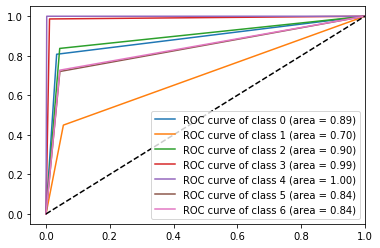

In [64]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_minmax, y_train)

y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
y_pred = model.predict(X_test_minmax)

y_pred = label_binarize(y_pred, classes=[0, 1, 2, 3, 4, 5, 6])

n_classes = 7
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])

np.mean(list(roc_auc.values()))

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

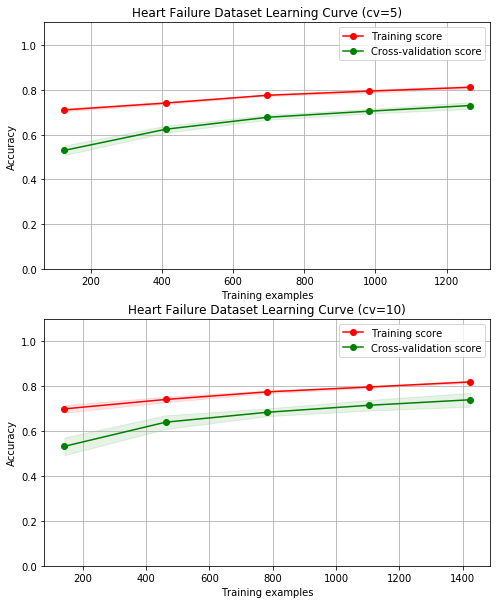

In [51]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
plot_learning_curve(KNeighborsClassifier(n_neighbors=6), 
                    'Heart Failure Dataset Learning Curve (cv=5)', 
                    X_train_minmax, y_train, axes=axes[0], ylim=(0.0, 1.1),
                    cv=5, n_jobs=4)
plot_learning_curve(KNeighborsClassifier(n_neighbors=6), 
                    'Heart Failure Dataset Learning Curve (cv=10)', 
                    X_train_minmax, y_train, axes=axes[1], ylim=(0.0, 1.1),
                    cv=10, n_jobs=4)